## Skill Assessment 4
## Name : Shraddha Pawar
## Batch : ML 18
## Title : Perform Clustering on the Crime Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("USArrests.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

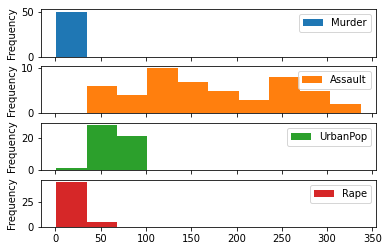

In [6]:
df.plot(kind="hist",subplots=True)

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)
X=df

In [8]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

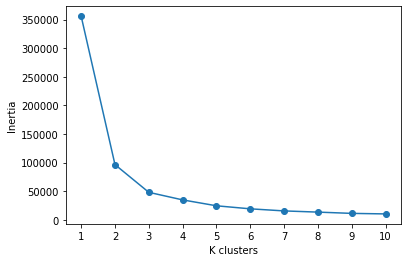

In [9]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [10]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [11]:
model.labels_

array([0, 0, 3, 2, 0, 2, 4, 0, 3, 2, 1, 4, 0, 4, 1, 4, 4, 0, 1, 3, 2, 0,
       1, 0, 2, 4, 4, 0, 1, 2, 0, 0, 3, 1, 4, 2, 2, 4, 2, 0, 1, 2, 2, 4,
       1, 2, 2, 1, 1, 2])

In [12]:
model.n_iter_

4

In [13]:
model.cluster_centers_

array([[ 11.76666667, 257.91666667,  68.41666667,  28.93333333],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [14]:
data=df
data["Final Label"]=model.labels_
data

,Murder,Assault,UrbanPop,Rape,Final Label
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,4
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,2


## Selecting only two features for model for visualization of Clusters
Murder and Rape are two important Features

In [15]:
X=df[["Murder","Rape"]]

In [16]:
X.head()

,Murder,Rape
0,13.2,21.2
1,10.0,44.5
2,8.1,31.0
3,8.8,19.5
4,9.0,40.6


## Elbow method to get optimal number of k on new data

In [17]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

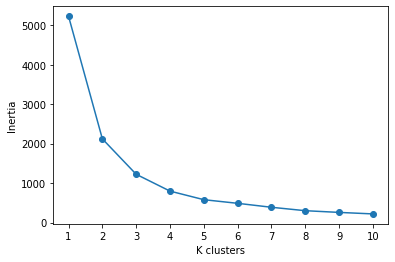

In [18]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

In [19]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [20]:
model.cluster_centers_

array([[10.24      , 40.98      ],
       [ 2.79166667, 10.70833333],
       [14.91666667, 20.81666667],
       [ 6.48125   , 18.39375   ],
       [10.13636364, 28.09090909]])

In [21]:
model.labels_

array([2, 0, 4, 3, 0, 0, 1, 3, 4, 2, 3, 1, 4, 3, 1, 3, 3, 2, 1, 4, 3, 0,
       1, 2, 4, 3, 3, 0, 1, 3, 4, 4, 2, 1, 3, 3, 4, 3, 1, 2, 1, 4, 4, 3,
       1, 3, 4, 1, 1, 3])

In [22]:
model.n_iter_

8

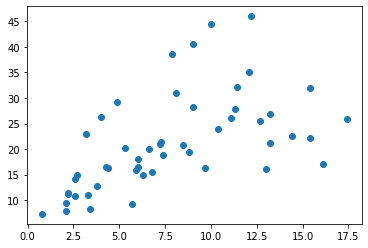

In [23]:
plt.scatter(df["Murder"],df["Rape"])

In [24]:
centroid=model.cluster_centers_
#just for checking centroid values
for i in range(centroid.shape[0]):
    print(centroid[i])
centroid.shape

[10.24 40.98]
[ 2.79166667 10.70833333]
[14.91666667 20.81666667]
[ 6.48125 18.39375]
[10.13636364 28.09090909]


(5, 2)

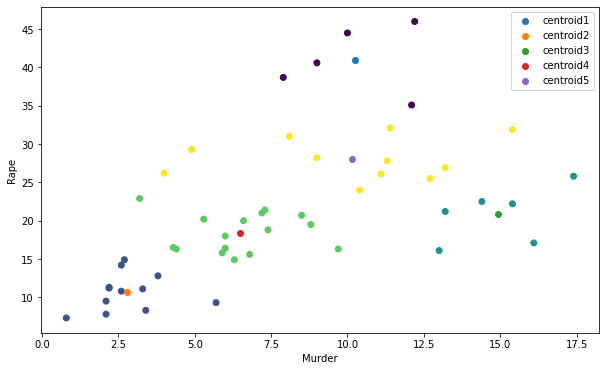

In [25]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df["Murder"],df["Rape"],c=model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.legend()